In [1]:
# Configuracion necesaria para el entorno de python.
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


azul class will be output 0 of the classifier
500 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



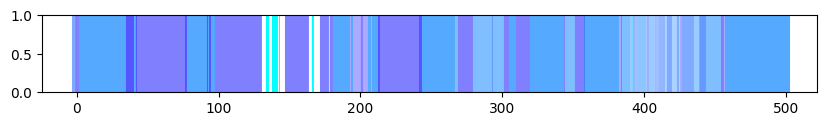

rojo class will be output 1 of the classifier
500 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



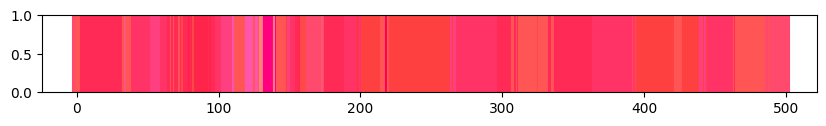

verde class will be output 2 of the classifier
500 samples captured for training with inputs ['Red', 'Green', 'Blue'] 



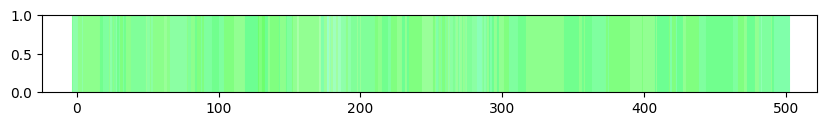

El dataset se ha prepadado .
Dataset dividido.


In [6]:
# Importacion de librerias.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput


# Establecemos un valor de semilla fijo para obtener los mismos valores aleatoreos
# cada vez que se ejecute el cuaderno.

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

CLASSES = [];

for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        CLASSES.append(os.path.splitext(file)[0])

CLASSES.sort()

SAMPLES_WINDOW_LEN = 1
NUM_CLASSES = len(CLASSES)

# creamos una matriz "ONE HOT ENCODING" para almacenar la salida.
ONE_HOT_ENCODED_CLASSES = np.eye(NUM_CLASSES)

inputs = []
outputs = []

# Leemos los archivos .CSV
for class_index in range(NUM_CLASSES):
  objectClass = CLASSES[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)
  # Eliminamos lineas vacias del archivo para que tensorflow no agregue Nan en algunas lineas.
  df = df.dropna()
  df = df.reset_index(drop=True)

  # calculamos el numero de grabaciones  para cada
  num_recordings = int(df.shape[0] / SAMPLES_WINDOW_LEN)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with inputs {list(df)} \n")

  # Graficamos
  plt.rcParams["figure.figsize"] = (10,1)
  pixels = np.array([df['Red'],df['Green'],df['Blue']],float)
  pixels = np.transpose(pixels)
  for i in range(num_recordings):
    plt.axvline(x=i, linewidth=8, color=tuple(pixels[i]/np.max(pixels[i], axis=0)))
  plt.show()

  # Cargamos nuestros tensores.
  output = ONE_HOT_ENCODED_CLASSES[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    inputs.append(tensor)
    outputs.append(output)

# convertimos la lista en un arreglo de numpy
inputs = np.array(inputs)
outputs = np.array(outputs)

print("El dataset se ha prepadado .")

# mezclamos los datos para que se repartan de una mejor manera en los datos de entrenamiento, prueba y vslidacion.
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# intercambiamos el orden de los datos de manera aleatorea.
inputs = inputs[randomize]
outputs = outputs[randomize]

# dividimos los datos en tres grupos: entrenamiento, prueba y validascion.
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Dataset dividido.")


In [3]:
#construimos nuestro modelo usando keras.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')) # softmax is used, because we only expect one class to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=400, batch_size=4, validation_data=(inputs_validate, outputs_validate))



Epoch 1/400
225/225 [==============================] - 2s 3ms/step - loss: 0.2007 - mae: 0.4209 - val_loss: 0.1816 - val_mae: 0.3986
Epoch 2/400
225/225 [==============================] - 1s 2ms/step - loss: 0.1544 - mae: 0.3612 - val_loss: 0.1297 - val_mae: 0.3223
Epoch 3/400
225/225 [==============================] - 0s 2ms/step - loss: 0.1046 - mae: 0.2782 - val_loss: 0.0855 - val_mae: 0.2406
Epoch 4/400
225/225 [==============================] - 0s 2ms/step - loss: 0.0635 - mae: 0.2003 - val_loss: 0.0487 - val_mae: 0.1726
Epoch 5/400
225/225 [==============================] - 1s 2ms/step - loss: 0.0332 - mae: 0.1334 - val_loss: 0.0231 - val_mae: 0.1068
Epoch 6/400
225/225 [==============================] - 0s 2ms/step - loss: 0.0147 - mae: 0.0801 - val_loss: 0.0105 - val_mae: 0.0603
Epoch 7/400
225/225 [==============================] - 0s 2ms/step - loss: 0.0076 - mae: 0.0484 - val_loss: 0.0068 - val_mae: 0.0377
Epoch 8/400
225/225 [==============================] - 0s 2ms/step - 

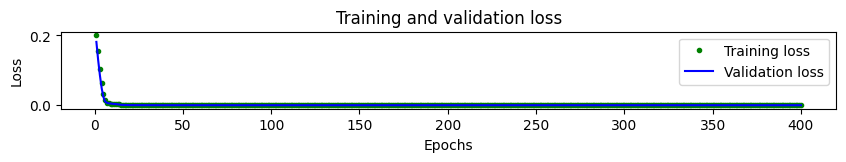

In [4]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

10/10 [==============================] - 0s 2ms/step
predictions =
 [[0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    

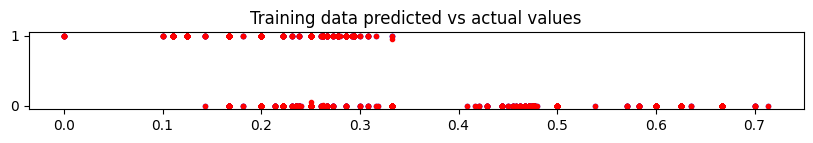

In [5]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpb4420jsx/assets
Model is 2936 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 18,140 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
